# 目次(Table of Contents)
### 1. バイアスとバリアンスについて説明せよ
### 2. Cross Validationについて説明せよ
### 3. sklearnのBoston house-pricesデータセットをloadして線形回帰を用いて学習せよ[(参考)](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
### 4. 学習させた結果をsklearnのCross Validationで評価せよ[(参考)](https://tech.mof-mof.co.jp/blog/scikit-learn-cross-validation.html)
### 5. 学習結果の平均・分散を計算せよ[(参考)](http://tekenuko.hatenablog.com/entry/2016/09/19/151547)

# 1. バイアスとバリアンスについて
[Bias–variance tradeoffのwikipedia](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)を参考
- バイアス(bias)とは、学習アルゴリズムの間違った仮定による誤差である。高いバイアスは、特徴量とターゲットの出力間の関連性を見逃す可能性がある(underfitting)
- バリアンス(variance)とは、トレーニングセットにおける小さなゆらぎ（変動）に対する感度から生じる誤差である。高いバリアンスは、アルゴリズムが意図した出力でなく、トレーニングデータのランダムノイズをモデル化する可能性がある(overfitting)

これならわかる深層学習（入門）を参考
- underfitting…データの豊かさに対してモデルの自由度が小さすぎると、データの構造をとらえることが全くできない。つまり訓練誤差の値が大きすぎて、何の予測能力も得られないこと。未学習(under learning)とも呼ばれる
- overfitting…モデルの自由度が大きすぎると、学習データのもつノイズ（統計的なゆらぎ）までも正確にフィッティングしてしまい、与えれた訓練データに関する訓練誤差の値はどんどん小さくなる。しかし、訓練データに適合することで未知のデータに対してどんどん予測能力を失っていく。

# 2. Cross Validation(交差検証)について
[交差検証のWikipedia](https://ja.wikipedia.org/wiki/%E4%BA%A4%E5%B7%AE%E6%A4%9C%E8%A8%BC)を参考
- 交差検証とは、統計学において標本データを分割し、その一部をまず解析して、残る部分でその解析のテストを行い、解析自身の妥当性の検証・確認に充てる手法を指す。データの解析がどれだけ本当に母集団に対処できるかを良い近似で検証・確認するための手法である。つまり、交差検証によってデータの分割によらない頑強な汎化精度の評価が可能になる。また、データセットを学習データとテストデータに分けた場合、テストデータを使わずに汎化性能が高いかどうか調べることができるのも特徴である。
- 交差検証の主な種類<br>
・ホールドアウト検証・・・初期標本群から事例を無作為に選択しテスト事例を形成し、残る事例を訓練事例とする。ただし、データを交差させないため、交差検証には分類されない<br>
・K-分割交差検証(K-fold cross-validation)・・・標本群をK個に分割し、そのうちの1つをテスト事例とし、残るK-1個を訓練事例とするのが一般的である。交差検証は、K個に分割された標本群それぞれをテスト事例としてk回検証を行う。そして、k個の精度の平均値をモデルの評価値とする<br>
・leave-one-out 交差検証(LOOCV，1個抜き検証)・・・標本群から1つの事例だけを抜き出してテスト事例とし、残りを訓練事例とする。これを全事例が1回ずつテスト事例となるよう検証を繰り返す。これはK-分割交差検証のKを標本サイズにした場合と同じである。ただし、LOCCVにはカーネル回帰やティホノフ正則化などと関連がある。

# 3. sklearnのBoston house-pricesデータセットをloadして線形回帰を行う

(354, 1) (152, 1)
(354,) (152,)
Coefficients: 
 [-0.968]
Mean squared error: 39.82
Variance score: 0.52


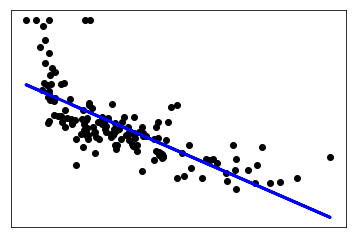

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
boston_X = boston.data

X_train, X_test, y_train, y_test = train_test_split(
                                    boston_X, boston.target,
                                    test_size=0.3, random_state=0)
X_train = X_train[:, np.newaxis, 12]
X_test = X_test[:, np.newaxis, 12]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

https://scikit-learn.org/stable/modules/cross_validation.html#the-cross-validate-function-and-multiple-metric-evaluation


# 4. 学習させた結果をsklearnのCross Validationで評価せよ
[sklearnのmodelの評価方法(scoring)](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)<br>
[jupyter notebookの数式表記方法](https://qiita.com/namoshika/items/63db972bfd1030f8264a)<br>
[CrossValidation + GridSearchCV](https://qiita.com/tomov3/items/039d4271ed30490edf7b)

In [22]:
# 最新のsklearnではcross_validationが存在しない？？？
#from sklearn import cross_validation
import numpy as np
np.set_printoptions(precision=3)
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# ボストンの家の部屋数と、家の価格データ（詳しくは公式参照）
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston
boston = datasets.load_boston()

# sklearn.model_selection.train_test_splitを使うと簡単にトレーニングデータとテストデータを分割出来る
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.4, random_state=0) # random_stateはrandom seedのこと、指定しなかったらrandomな変数になる
print(boston.data.shape, X_train.shape, X_test.shape)

# 学習
regr = linear_model.LinearRegression()

# regr.score: 決定係数を出力。予測値xと正解値yの相関を測る
# あるパラメータにおけるcv回の平均スコア（R^2)
# ただし、線形回帰はパラメータがないためCross Validationで最適なパラメータを探す必要がないためあまり意味はない？
scores = cross_val_score(regr, X_train, y_train, cv=5, scoring='r2')
print('scores: {}'.format(scores))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

(506, 13) (303, 13) (203, 13)
scores: [0.593 0.744 0.552 0.794 0.775]
Accuracy: 0.69 (+/- 0.20)


数値的にモデルの性能を評価する指標の例に、平均二乗誤差(Mean Squared Error: MSE)や決定係数($R^2$)がある<br>
$MSE=\frac{1}{n}\sum_{i=1}^{n}(y^{(i)}-y^{(i)}_{pred})^2$<br>
$R^{2}=1-\frac{MSE}{Var(y)}$<br>
$R^{2}$スコアは負～1.0の値を取るので、0.69はそこそこできていると感じた

# 5. 学習結果の平均・分散を計算せよ
[Plotting Validation Curves](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py)<br>

In [17]:
regr.fit(X_train, y_train)
pred = regr.predict(X_test)
print('regr: {}'.format(regr.coef_))
print('pred_mean: {}, pred_var: {}'.format(np.mean(pred), np.var(pred)))
print('true_mean: {}, true_var: {}'.format(np.mean(y_test), np.var(y_test)))

regr: [-1.037e-01  5.586e-02  5.882e-02  2.505e+00 -1.903e+01  3.254e+00
 -3.222e-03 -1.576e+00  2.587e-01 -1.147e-02 -1.108e+00  5.501e-03
 -5.596e-01]
pred_mean: 22.096720823737087, pred_var: 60.40325264082388
true_mean: 22.213793103448275, true_var: 82.73054866655343
